## Parallel Processing with Dask 

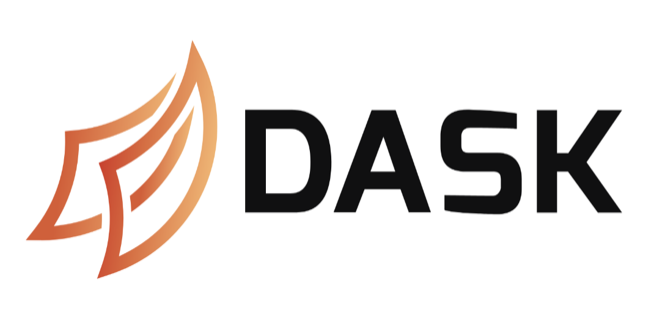

## Agenda

 - Big Data 
 - Dask
 - DAG - Directed Acyclic Graphs 
 - Advantages of Dask

## Big Data

<center> <font size="6px">How would you characterize "Big Data"?</font></center>

## What is Dask? 

 - [Dask](https://docs.dask.org/en/stable/) is a flexible library for parallel computing in Python
 - Dask was launched 2014 by _Matthew Rocklin_ 
   - **aim**: bring native scalability to Python Open Data Science Stack and overcome single-machine restrictions 

## Dask 

 - Dask is composed of two parts:
   - **dynamic task scheduling** optimized for computation 
   - **"big data" collections** like parallel arrays, dataframes and lists 
     - these parallel collections run on top of dynamic schedulers 

## Dask Task Graphs 

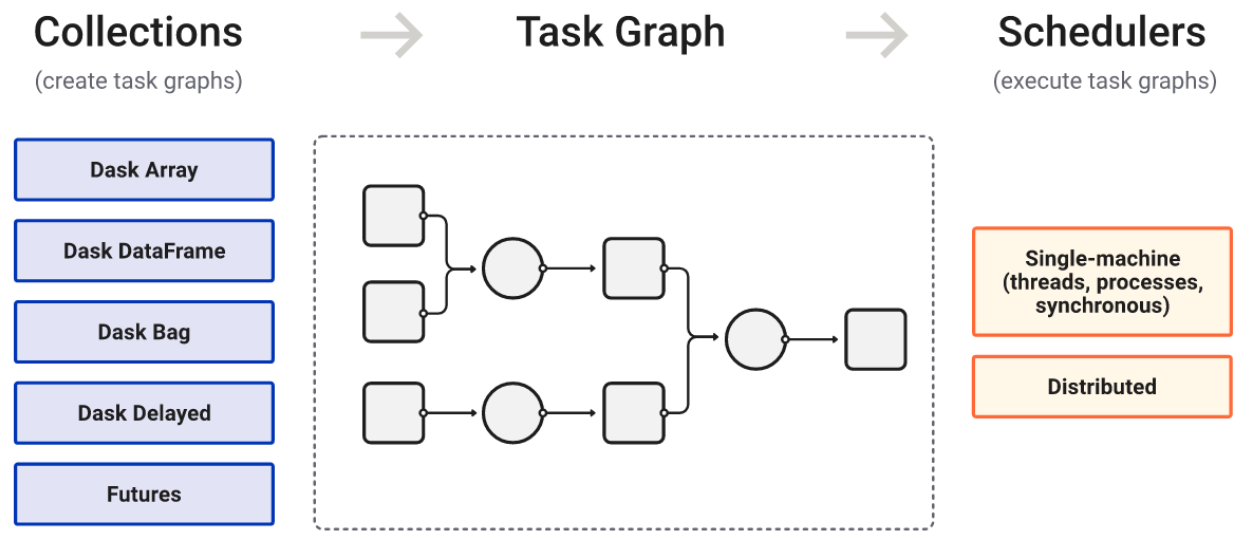

## Dask Components 

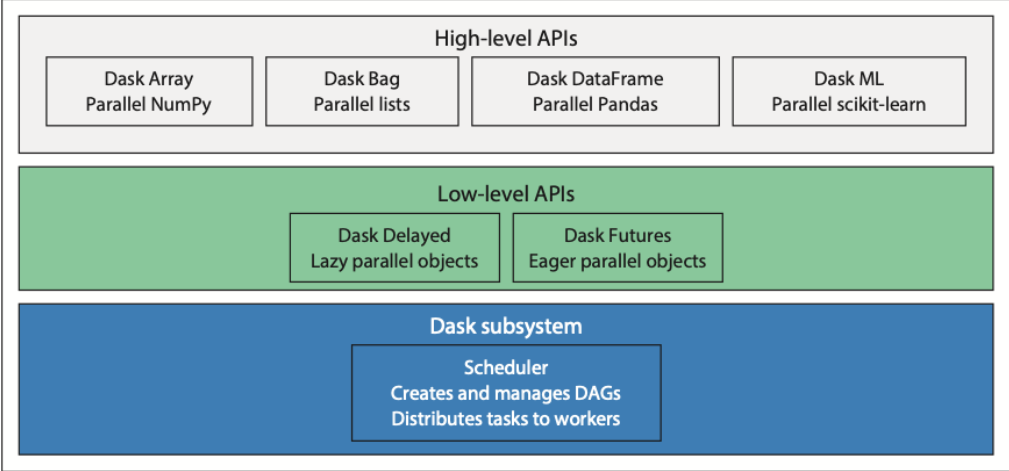

## DAGs - Directed Acyclic Graphs 

 - graph theory describes a graph as a representation of a set of objects that have a relationship with one another
 - [Wikipedia](https://en.wikipedia.org/wiki/Directed_acyclic_graph): a **DAG** consists of vertices and edges, with each edge _directed_ from one vertex to another, such that following those directions will _never form a closed loop_
   - there is <font color="red">one logical, one-way traversal through the graph</font> from nodes with no dependencies to a single terminal node
 - Dask’s task schedulers use the concept of directed acyclic graphs to **compose**, **control** and **express** computations

## DAG of a Recipe 

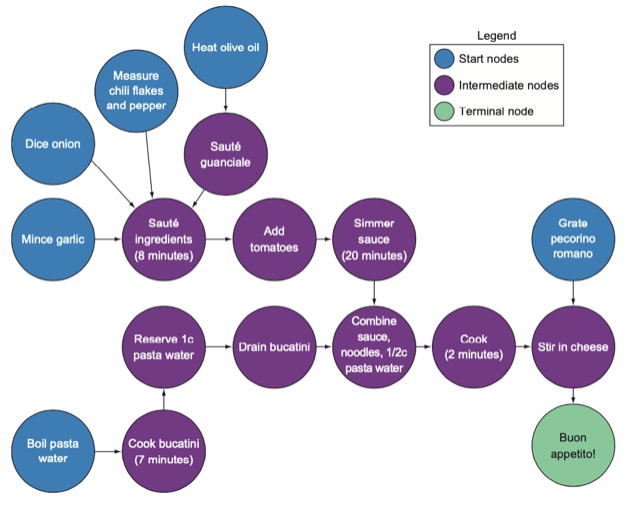

## Concurrency 

- <font color="red">resource starvation</font>: a process is denied necessary resources to process its work 
- <font color="red">resource lock</font>: when a shared resource is in use, a resource lock is placed on it
   - other workers can't [steal](https://distributed.dask.org/en/stable/work-stealing.html) the resource until the worker who locked the resource is finished using it
- the **task scheduler** in a scalable computing framework deals with resource contention and locking 

## Recovering from failures

- increasingly difficult to orchestrate distribution of processing tasks as the cluster size increases
- <font color="red">worker failure</font>: no data loss -- the work that the failed worker completed does not need to be reproduced
    - no severe impact to performance 
- <font color="red">data loss</font>: the complete lineage of operations up to a given node can be "replayed" in the event of a failure 
    - significant impact to performance
    - task-scheduler responsible for stopping work and redistributing work to be replayed 

## Lazy Computations

 - lazy computations allow Dask to <font style="color:rgb(25,118,210)">split work into smaller logical pieces</font> 
   - you can avoid loading the entire data structure into memory 
 - the computations we defined are represented by a DAG, but we still need to specify
   - where the computations will take place 
   - where the results of each computation should be transferred to 
 - the task scheduler dynamically assesses what work has been completed, what work is left to do, and what resources are free to accept additional work in real time
   - allows handling of issues with worker failures, network unreliability and workers completing work at different speeds

## [Data Locality](https://distributed.dask.org/en/stable/locality.html)

 - each Dask worker reports what data it has available and how much load it is experiencing to the task scheduler
 - the task scheduler constantly evaluates the state of the cluster to come up with efficient execution plans 
 - (in most scenarios) if the task scheduler divides up the work as evenly as possible across machines in the cluster, the computations will complete as quickly and efficiently as possible
 - if there is a worker under heavier load / with weaker hardware / without fast access to data it will lag behid the others and should be given proportionally fewer tasks to avoid becoming a bottleneck
 $\Rightarrow$ the dynamic task scheduler can react to such situations 
 - for best performance, a Dask cluster should use a [distributed filesystem](https://en.wikipedia.org/wiki/Comparison_of_distributed_file_systems) like [S3](https://en.wikipedia.org/wiki/Amazon_S3) or [HDFS](https://en.wikipedia.org/wiki/Apache_Hadoop#HDFS) 

## Data Locality 

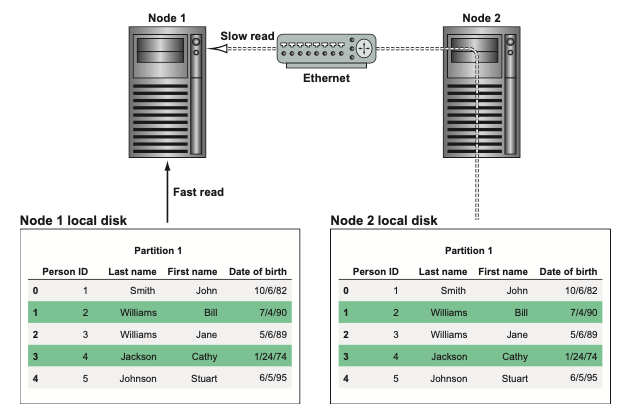

## Advantages of Dask in the Python Ecosystem

- it is fully implemented in Python and **natively scales NumPy and Pandas**
  - leads to easy transition from small to medium and large datasets
  - easy to <font style="color:rgb(25,118,210)">prototype tasks locally</font> and then submit them to a cluster
- it can be used effectively to work with medium datasets on your machine and “big data” on a cluster
- it can be used as a <font style="color:rgb(25,118,210)">general framework for parallelizing</font> most Python objects
- it has a very <font style="color:rgb(25,118,210)">low configuration and maintenance overhead</font>

## Delayed Distributed Computations 

In [1]:
from dask.distributed import Client

# Setup a local cluster.
# By default this sets up 1 worker per core
client = Client()
client.cluster

LocalCluster(0eb5b001, 'tcp://127.0.0.1:59951', workers=4, threads=8, memory=8.00 GiB)

#### Example -- Delayed Distributed Computations (from the [SciPy Dask Tutorial](https://www.youtube.com/watch?v=EybGGLbLipI)) 

In [2]:
from dask import delayed
import time

def inc(x):
    time.sleep(5)
    return x + 1

def dec(x):
    time.sleep(3)
    return x - 1

def add(x, y):
    time.sleep(7)
    return x + y

#### Example -- Delayed Distributed Computations

In [3]:
x = delayed(inc)(1)
y = delayed(dec)(2)
total = delayed(add)(x, y)
total.compute()

3

#### Example -- Delayed Distributed Computations

If you visit [the Dask dashboard](http://127.0.0.1:8787/status), you should see this result

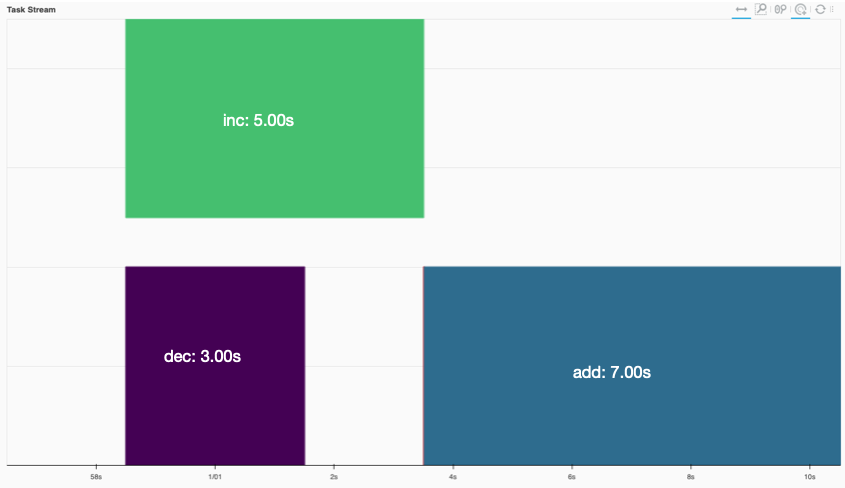

## [Dask Arrays](https://docs.dask.org/en/stable/array.html) 

- Dask Array implements a subset of the NumPy ndarray interface
- large arrays are cut into many small arrays which allows computing on arrays larger than memory 
- for examples using Dask Array see: [https://examples.dask.org/array.html](https://examples.dask.org/array.html)

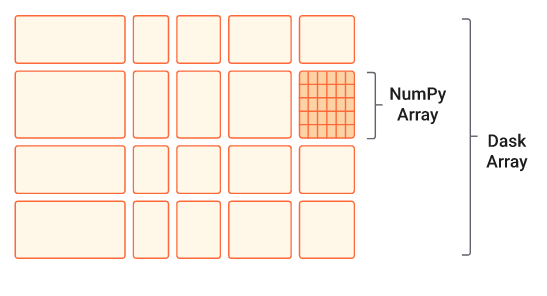

In [4]:
import dask.array as da

arr = da.random.random(size=(1_000, 1_000), chunks=(500, 500))
arr

dask.array<random_sample, shape=(1000, 1000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [5]:
arr_sum = arr.sum()
arr_sum

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [6]:
arr_sum.compute()

500264.7158567471

## Visualizing the Task Graph

- by running the command `arr_sum.visualize()` you can visualize the generated task graph

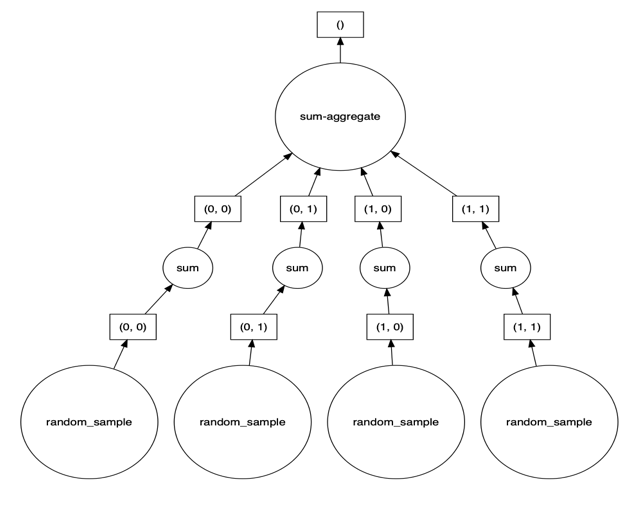

## [Dask DataFrames](https://examples.dask.org/dataframe.html)

- Dask Dataframes coordinate many Pandas dataframes, partitioned along an index 
- they support a large subset of the Pandas API
- Dask operations are lazy (i.e. they build up a task graph instead of executing immediately)

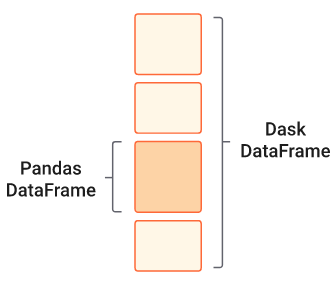

## Dask DataFrames

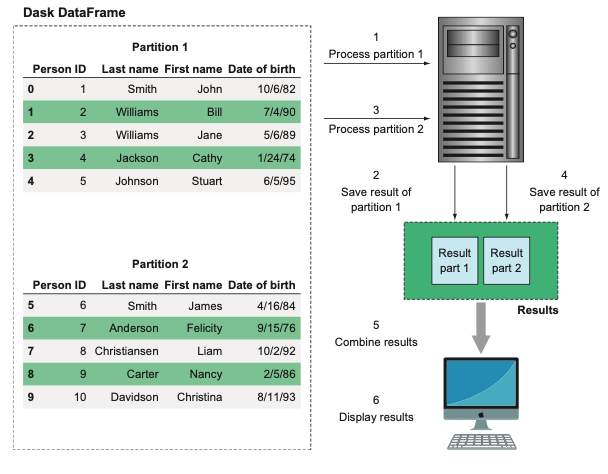

## Limitations w.r.t. Pandas API

 - Dask covers only a small but important part of the Pandas API (the Pandas API is huge)
 - some operations are very hard to do in parallel (e.g. sort)
 - for additional information on Dask Dataframes: [DataFrame documentation](https://docs.dask.org/en/latest/dataframe.html), [DataFrame API](https://docs.dask.org/en/latest/dataframe-api.html) and [DataFrame examples](https://examples.dask.org/dataframe.html)

## When should I use a Dask DataFrame?

 - when Pandas is usually needed, but fails due to data size or computation speed
 - distributed computing with standard Pandas operations like groupby and join 
 - for parallelization of complex / costly computations by using many cores
 

## When is a Dask DataFrame not the best choice?

- if your data fits in RAM -- then you should use Pandas
- if you need a proper database, use a proper database
- if you need functions not implemented by Dask DataFrame, see DaskDelayed

In [7]:
import dask
import dask.dataframe as dd
ddf = dask.datasets.timeseries()

/Users/korbinianziegltrum/miniconda3/envs/dask/lib/python3.12/site-packages/dask_expr/_collection.py:5831: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


In [8]:
ddf

,name,id,x,y
npartitions=30,,,,
2000-01-01,string,int64,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [9]:
ddf.head()

,name,id,x,y
timestamp,,,,
2000-01-01 00:00:00,Wendy,1012,-0.572544,-0.577963
2000-01-01 00:00:01,Xavier,1013,-0.533891,-0.384669
2000-01-01 00:00:02,Bob,970,0.036303,0.367806
2000-01-01 00:00:03,Alice,981,0.757289,-0.024114
2000-01-01 00:00:04,Patricia,957,0.634895,-0.741969


### Exercise 

 - Count how often the name "_Zelda_" appears in your dataframe `ddf`

In [10]:
zelda_count = ddf[ddf['name'] == 'Zelda'].name.count().compute()
zelda_count

99618

### Exercise

- How often does each name appear in the dataframe? Compute the result, put it in a dataframe and save it as a csv-file on disk.

In [11]:
name_counts = ddf['name'].value_counts().compute()
name_counts

2024-06-12 14:45:11,222 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 901711a35f8f4ae4dba15054c235a4f4 initialized by task ('shuffle-transfer-901711a35f8f4ae4dba15054c235a4f4', 10) executed on worker tcp://127.0.0.1:59964
2024-06-12 14:45:11,659 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle 901711a35f8f4ae4dba15054c235a4f4 deactivated due to stimulus 'task-finished-1718196311.658127'


name
Michael      99149
Ursula      100323
Victor       99424
Kevin        99653
Jerry        99300
Norbert      99890
Tim          99489
Xavier       99750
Ingrid      100016
Charlie      99625
George       99429
Ray          99971
Patricia     99658
Yvonne       99817
Frank        99822
Quinn        99784
Wendy        99640
Bob          99982
Laura       100105
Zelda        99618
Sarah        99118
Dan          99749
Edith        99875
Hannah      100345
Alice        99377
Oliver       99091
Name: count, dtype: int64[pyarrow]

## [Deployment](https://docs.dask.org/en/stable/deploying.html) 

- the dask.distributed scheduler works well on a single machine and scales to many machines in a cluster
- there are a number of different cluster managers available, so you can use Dask distributed with a range of platforms

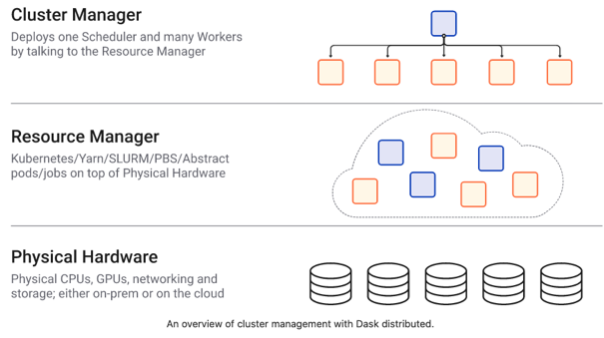

## Literature

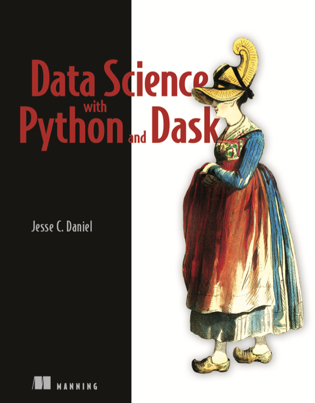

## References 

- Slides 6,20,25,35; Image Source: [Dask documentation](https://docs.dask.org/en/stable/)
- Slides 7,9,14,26,36; Image Source:  J.C. Daniel - Data Science with Python and Dask, Manning, 2019 

In [12]:
# don't forget to shut down your client when you are finished with your computations
client.shutdown()